In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
sns.set()

Randomly generate 100 points belonging to two 2D Gaussian (X - point, y - label of the belonging Gaussian), plot the points.

Text(0.5, 1.0, 'Naive Bayes Model')

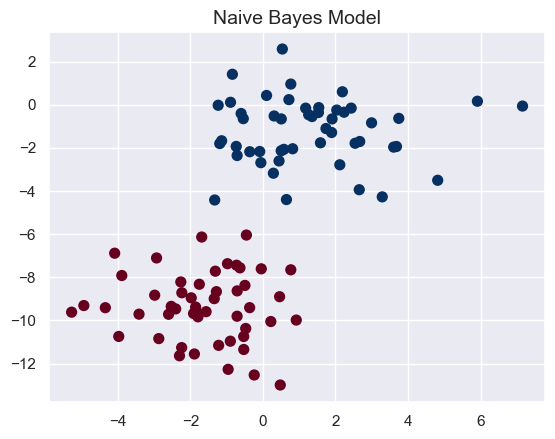

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

fig, ax = plt.subplots()

ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
ax.set_title('Naive Bayes Model', size=14)

TODO - Fit the data (X, y) to 2 Gaussians using sklearn.mixture.GaussianMixture. Print the calculated means and covariances.

In [3]:
gmm = GaussianMixture(n_components=2, random_state=2)
gmm.fit(X)

# Get means and covariances
mu = gmm.means_
cov = gmm.covariances_

print("Means of the Gaussians:")
print(mu)
print("\nCovariances of the Gaussians:")
print(cov)

Means of the Gaussians:
[[ 1.30227383 -1.23165348]
 [-1.64818873 -9.35021545]]

Covariances of the Gaussians:
[[[ 3.31897972 -0.01380686]
  [-0.01380686  2.20992289]]

 [[ 2.05509959 -0.17207709]
  [-0.17207709  2.56629724]]]


C:\Users\Hasan\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Generate randomly 20 test points (uniformly, independently of Gaussians)




In [4]:
# Pseudo-random generator
rng = np.random.RandomState(0)

In [5]:
Xnew = rng.rand(20, 2)

# Move and spread out the points
Xnew *= np.array([14,19])
Xnew += np.array([-6,-15])
Xnew

array([[  1.68338905,  -1.41140204],
       [  2.43868727,  -4.64721952],
       [ -0.06883281,  -2.72801185],
       [  0.12622096,   1.94368701],
       [  7.49127865,  -7.71461114],
       [  5.08415053,  -4.95099652],
       [  1.95262386,   2.58633613],
       [ -5.00549519, -13.34454331],
       [ -5.71694244,   0.81977707],
       [  4.89419451,   1.53023082],
       [  7.70065679,   0.18401272],
       [  0.46071107,  -0.16994565],
       [ -4.34415804,  -2.84150059],
       [ -3.99305398,   2.94870942],
       [  1.3058765 ,  -7.12142314],
       [ -2.29622143,  -0.2895599 ],
       [  0.38610465,  -4.19975497],
       [ -5.73694279,  -3.26492556],
       [  2.56934012,  -3.27825406],
       [  7.2124731 ,  -2.04541432]])

TODO - Predict to which Gaussian each test point belongs, print the predictions.




In [6]:
ynew = ...

Make the contour plot of the Gaussian model based on calculated parameteres. Add test samples to the plot.

[(-8.0, 8.0), (-15.0, 5.0)]

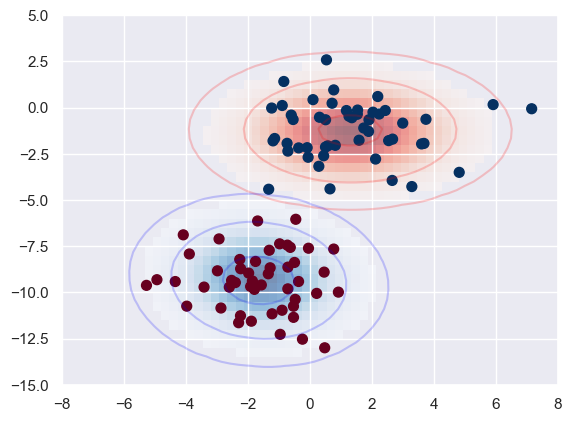

In [7]:
def gaussian(X, mu, cov):
    P = np.zeros((X.shape[0],), dtype=float)
    N = (1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(cov))))
    for c, x in enumerate(X):
      x_m = (x - mu)
      P[c] = N * np.exp(-0.5 * (x_m.T @ np.linalg.inv(cov) @ x_m))
    return P

xlim = (-8, 8)
ylim = (-15, 5)

xg = np.linspace(xlim[0], xlim[1], 60)
yg = np.linspace(ylim[0], ylim[1], 40)
xx, yy = np.meshgrid(xg, yg)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

fig, ax = plt.subplots()
# Plot original data
ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
# Contour plot of the model
for label, color in enumerate(['red', 'blue']):
    P = gaussian(Xgrid, mu[label], cov[label])
    Pm = np.ma.masked_array(P, P < 0.002)
    ax.pcolorfast(xg, yg, Pm.reshape(xx.shape), alpha=0.5,
                  cmap=color.title() + 's')
    ax.contour(xx, yy, P.reshape(xx.shape),
               levels=[0.001, 0.01, 0.05, 0.09],
               colors=color, alpha=0.2)
    
# Adding test predictions    
for label, color in enumerate(['lightcoral', 'aqua']): 
    mask = (ynew == label)
    Xnew_ = Xnew[mask]
    ax.scatter(Xnew_[:, 0], Xnew_[:, 1], c=color, s=50)
ax.set(xlim=xlim, ylim=ylim)